<h1>xml을 알맞은 형태의 txt로 변경하기</h1>

In [7]:
from glob import glob

#image와 DATA 가 존재하는 DIR 정의
contentDIR = '../'

#xml 파일 명 가져오기
xml_list = glob(f'{contentDIR}*.xml')

#predefined_classes에 넣은 순서대로 index 지정 
predefined_class_setting = {
    'head':'0',
    'helmet' : '1',
    'person' : '2'
}

In [8]:
xml_list

['../testImage.xml']

In [9]:
!pip install xmltodict
import xml.etree.ElementTree as elemTree

def xml_to_txt(xml_file_path):
    resultArray = []

    tree = elemTree.parse(xml_file_path)
    root = tree.getroot()
    imgshape = [] ## width,height,depth
    for sizeConfig in root.find('size'):
        imgshape.append(sizeConfig.text)
 
    for object_tag in root.findall('object'):
        class_ = object_tag.find('name').text
        
        bndbox = []  ##xmin,ymin,xmax,ymax
        for boxConfig in object_tag.find('bndbox'):
            bndbox.append(boxConfig.text)

        box_width = float(bndbox[2]) - float(bndbox[0]) #x_max - x_min
        box_height = float(bndbox[3]) - float(bndbox[1]) #y_max - y_min
        box_center_x = float(bndbox[0]) + box_width/2 #x_min + box_width/2
        box_center_y = float(bndbox[1]) + box_height/2 #y_min + box_height/2

        #normalization
        box_center_x = box_center_x / float(imgshape[0]) # center_x / width
        box_center_y = box_center_y / float(imgshape[1]) # center_y / height
        box_width = box_width / float(imgshape[0]) # dw / width
        box_height = box_height / float(imgshape[1]) # dy / height

        resultArray.append([predefined_class_setting[class_],str(box_center_x),str(box_center_y),str(box_width),str(box_height),'\n'])

        #write to file
    
    dstpath=xml_file_path.split('/')[-1].split('.xml')[0]
    print(dstpath)
    with open(f'{dstpath}.txt','a') as f:
        for i in resultArray:
            f.write(' '.join(i))
        f.close()    




In [10]:
for i in range(len(xml_list)):
    xml_to_txt(xml_list[i])
    


testImage


<h1>알맞은 형태로 잘렸는지 확인하기</h1>

In [11]:
def image_crop_by_label(label,img):        
    label = label.split(' ')
    width,height = img.size
    class_ = int(label[0])
    box_center_X = float(label[1]) * width
    box_center_Y = float(label[2]) * height 
    box_width = float(label[3]) * width 
    box_height = float(label[4][:-2]) * height 
    
    print(classlist[class_], box_center_X, box_center_Y, box_width, box_height,width,height)
    
    cropValue = (box_center_X - box_width/2, box_center_Y - box_height/2, box_center_X + box_width/2, box_center_Y + box_height/2) #좌측상단 X, 좌측상단 Y,우측하단X, 우측상단Y
    plt.imshow(img.crop(cropValue))
    plt.show()


helmet 266.5 201.5 55.0 48.999999999999616 500 666


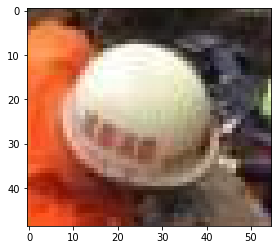

helmet 213.0 253.5 38.0 44.99999999999962 500 666


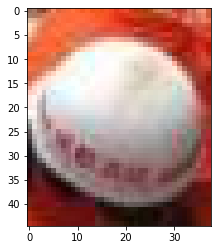

helmet 245.0 389.49999999999994 60.0 40.99999999999962 500 666


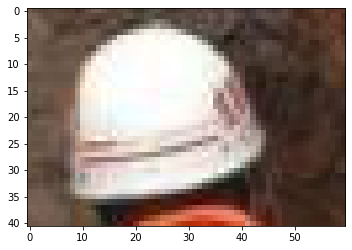

helmet 355.5 387.5 51.0 30.999999999999968 500 666


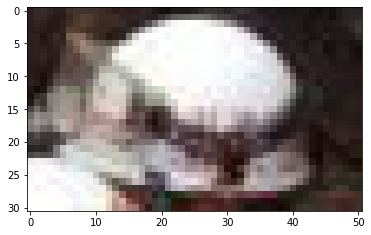

helmet 333.0 409.0 46.0 33.999999999999964 500 666


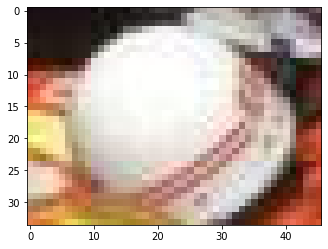

helmet 329.0 458.5 80.0 58.9999999999996 500 666


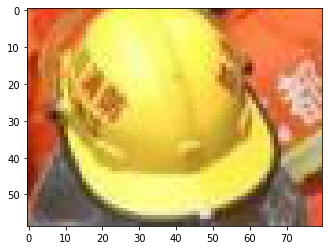

head 170.5 262.5 51.0 50.999999999999616 500 666


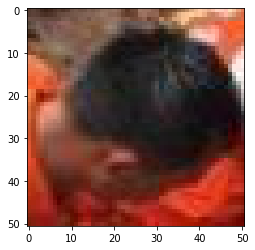

In [13]:
from PIL import Image
from matplotlib import pyplot as plt
classlist = ['head','helmet','person']

#bounding box config 로드  
f = open(f'./testImage.txt','r')

#imgae 로드 
img = Image.open(f'../testImage.jpg','r')

#label default value setting 
label = ''

while True:
    label = f.readline()
    if label=='':
        break
    image_crop_by_label(label,img)    
    
    
    
f.close()

    
